In [115]:
import pandas as pd
import numpy as np

# we will use this for QQ-plot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score       # CrossValidationScore

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer


In [116]:
# Mathematical Transformations:
# These are applied to numerical features to change their scale or distribution
# (not their meaning) so that ML models can learn better.
# They are mainly used to:
# - Reduce skewness
# - Handle large value ranges
# - Reduce the effect of outliers
# - Make data more model-friendly (often closer to normal distribution)


#### How to find if data is in normal scale or not?

In [117]:
# Method1: Use seaborn  sns.distplot() to visualize it
# Method2: Use Pandas pd.skew().. If its =0 or near 0 then its not scattered but if its -1 or 1 then its heavily stattered 

# Method3: Use QQ-Plot  (Very reliable)

# Function Transformers
##### -Log Transform
##### -Reciprocal Transform
##### -sq/sqrt Transform
##### -Costum Transform (Your own Transformer)

### 1. Log Transform

In [118]:
# Log Transformation:
# Applied to highly right-skewed (i.e +vely skewed) data (long tail on the right).
# It compresses large values more than small ones,
# reducing the effect of outliers and extreme values.
# Commonly used for features like income, price, population.
# Note: Log cannot be applied to zero or negative values.
# After this transformation  our Linear Models starts to perform better

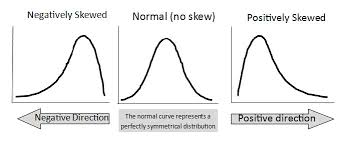

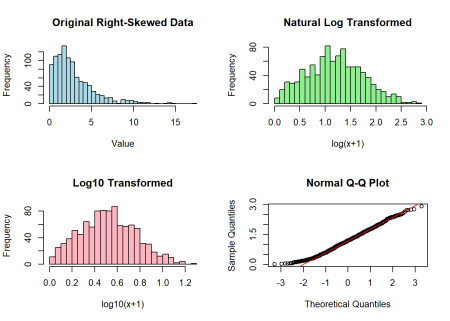

In [119]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [120]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [121]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [122]:
# Since Age column has missing values so filling those missing values with the mean
df.fillna(df['Age'].mean(), inplace=True)

In [123]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [124]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [125]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns = ['Survived']), df['Survived'], test_size=0.2, random_state=42)

In [126]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


#### Checking if data is normally distributed or not

C:\Users\prabe\AppData\Local\Temp\ipykernel_51908\1834995899.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])       # Training data to 'Age' column kattiko scatter xa ta herumna


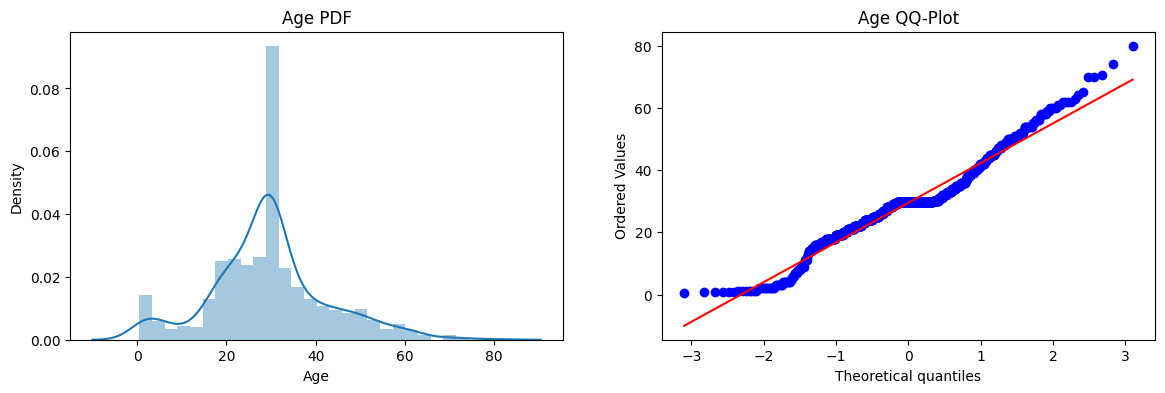

In [127]:
# To visualize two plots side-by-side, you can use the plt.subplots() function to create a grid with one row and two columns. 

plt.figure(figsize=(14,4))
plt.subplot(121)    # 121 means  Grid with 1-row, 2-column ko 1st column use gar
sns.distplot(X_train['Age'])       # Training data to 'Age' column kattiko scatter xa ta herumna
plt.title('Age PDF')               # PDF = Probability density function

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ-Plot')

plt.show()

In [128]:
# you can say "Age is Quiet normally distributed"

C:\Users\prabe\AppData\Local\Temp\ipykernel_51908\2328964060.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


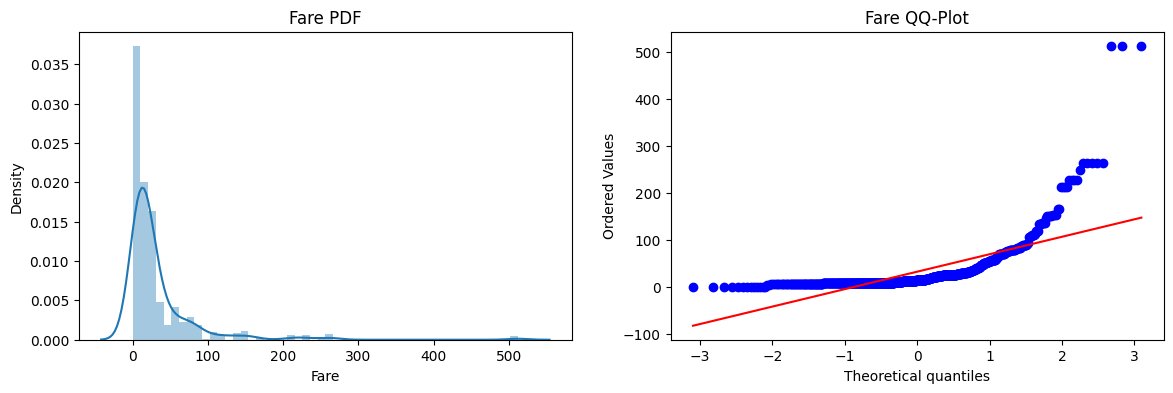

In [129]:
 
plt.figure(figsize=(14,4))
plt.subplot(121)    
sns.distplot(X_train['Fare'])       
plt.title('Fare PDF')              

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ-Plot')

plt.show()

In [130]:
# Fare is Right skewed and not normally distributed
# so you can apply log transform on Fare

#### Now, Before Transforming the model lets check the accuracy of our model on our dataset

In [131]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
Y2_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(Y_test, Y_pred))
print("Accuracy DT", accuracy_score(Y_test, Y2_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [132]:
# 64% accuracy on LogisticRegression
# 68% accuracy on DecisionClassifireTree


#### Applying Log Transform

In [133]:
from sklearn.preprocessing import FunctionTransformer

In [134]:
ft = FunctionTransformer(func=np.log1p)   

In [135]:
# log = normal log but if log0 comes then there will be problem so to handle this problem 
# we did log1p = log(X+1)   means even if 0 comes then log(0+1) = log1

In [136]:
X_train_transformed = ft.fit_transform(X_train)
X_test_transformed = ft.transform(X_test)

In [137]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, Y_train)
clf2.fit(X_train_transformed, Y_train)

Y_pred = clf.predict(X_test_transformed)
Y2_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(Y_test, Y_pred))
print("Accuracy DT", accuracy_score(Y_test, Y2_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.659217877094972


In [138]:
# Here you can see the accuracy of the model increased by some factors than before..

In [139]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Costum Transformations

In [140]:
def apply_transform(transform):
    # Ensure column names match what you are using later (e.g., 'Fare' instead of index 2)
    # The original code used indices 1:3 for X, implying columns 1 and 2. 
    # Let's assume the columns are named 'Age' and 'Fare' for clarity and to match plot labels.
    # Adjust column names/indices as needed based on your actual df structure.
    X = df.iloc[:, 1:3] 
    Y = df.iloc[:, 0]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Apply the transform
    # The ColumnTransformer needs to be fit and transformed
    trf1 = ColumnTransformer([
        ('log_transform', FunctionTransformer(transform), [1]) # Index 1 within X corresponds to the second column ('Fare')
    ], remainder='passthrough')
    
    # Fit and transform the training data
    x_train_transformed = trf1.fit_transform(x_train)
    # Transform the test data (do not fit on test data)
    x_test_transformed = trf1.transform(x_test)

    # Train the classifier on the *transformed* data
    clf3 = LogisticRegression()
    clf3.fit(x_train_transformed, y_train)
    y_predict = clf3.predict(x_test_transformed)

    print("Accuracy LogisticRegression = ", accuracy_score(y_test, y_predict))

    # --- Plotting ---

    # To plot the transformed data, we need to extract it from the numpy array output of ColumnTransformer
    # The 'Fare' column is the first one in the transformed output due to 'passthrough' placing it first
    fare_before = x_train.iloc[:, 1]
    fare_after = x_train_transformed[:, 0] # Extract the first column (transformed 'Fare') as a numpy array

    plt.figure(figsize=(14,4))
    plt.subplot(121)    
    stats.probplot(fare_before, dist='norm', plot=plt)       
    plt.title('Fare before transform')              
    
    plt.subplot(122)
    stats.probplot(fare_after, dist='norm', plot=plt)
    plt.title('Fare after transform')
    
    plt.show()

#### Square Transformation

Accuracy LogisticRegression =  0.6089385474860335


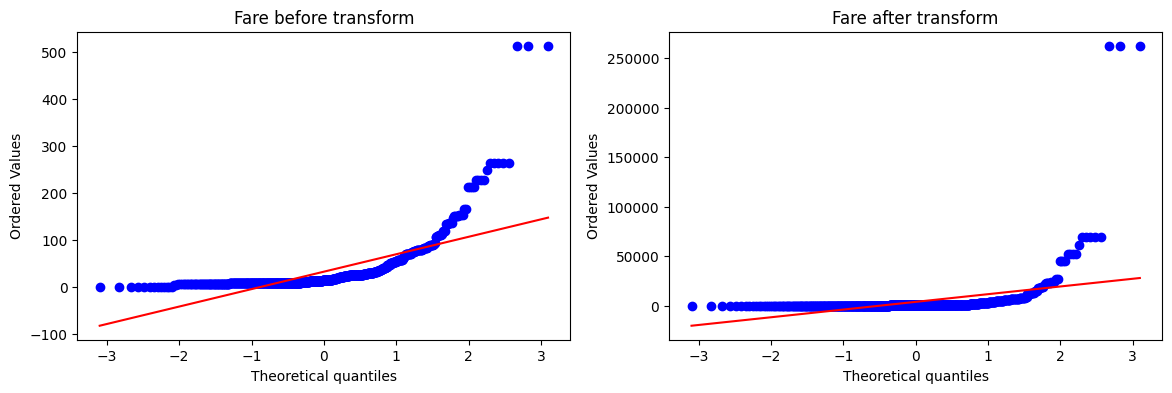

In [141]:
apply_transform(lambda x: x**2)   # Square Transformation
# Accuracy gets decreased more

#### Recriprocal Transformation

Accuracy LogisticRegression =  0.6480446927374302


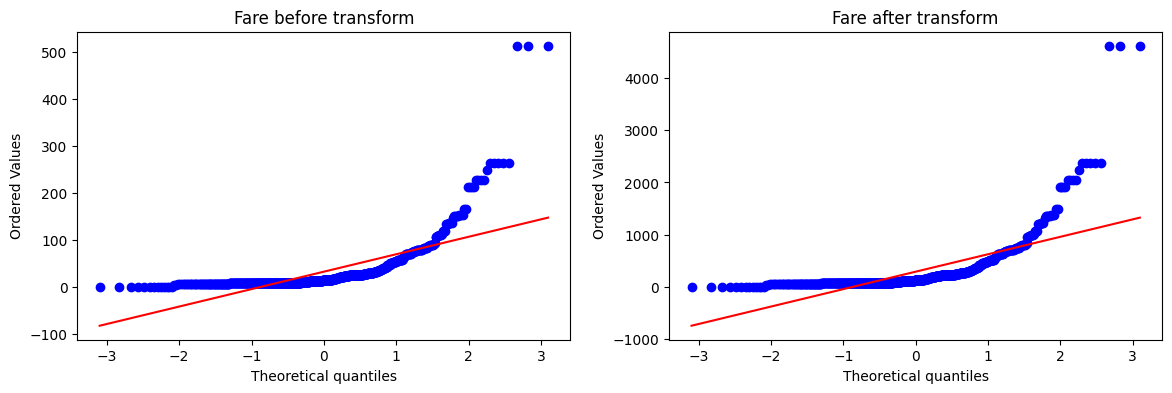

In [142]:
apply_transform(lambda x: x/(0.111))   # Square Transformation
# Accuracy gets decreased more